Presentado por: Diego Quisi

# Entornos de soporte al desarrollo de simulaciones: Simpy - Parte 2


## Generacion de graficar de atencion. 

En base a la simulacion anterior generar una grafica de los autos atendidos.

In [15]:
import simpy
import random
import matplotlib.pyplot as pp

%matplotlib inline

# Maximo de vehiculos que puede recibir el negocio
MAX_VEHICULOS = 57
# Total de maquinas de lavado con que cuenta el negocio
NUM_MAQUINAS = 3
# Tiempo que tarda en lavarse un vehiculo (minutos)
TIEMPO_LAVADO = 10 
# Intervalo de tiempo en que llegan vehiculos (minutos)
INTERVALO_LLEGADA = 3
# Tiempo de simulación
TIEMPO_SIMULACION = 27

# Creamos un diccionario para almacenar las horas en que se lavan los vehiculos
tiempo={}

class Lavanderia(object):
    
    def __init__(self, environment, num_maquinas, tiempo_lavado):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Creamos el recurso que representa las maquinas
        self.maquinas = simpy.Resource(environment, num_maquinas)
        # Variable para el tiempo de lavado
        self.tiempo_lavado = tiempo_lavado
        
    def lavar_vehiculo(self, vehiculo):
        # Este metodo representa el proceso de lavado del vehículo.
        # Se ingresa el vehículo y se lava
        
        # Simulamos el tiempo que tarda en lavarse el vehiculo
        # Es importante notar que la instruccion "yield" es distinta de "sleep"
        # ya que esta ultima bloquea el hilo de ejecucion durante 't' unidades de tiempo,
        # mientras que 'yield' no bloquea el hilo de ejecucion, solo lo suspende mientras
        # el evento de 'lavado' se realice
        yield self.env.timeout(random.randint(TIEMPO_LAVADO-5, TIEMPO_LAVADO+5))
        
        # Simulamos que se ha limpiado parte (%) de la suciedad del vehiculo
        # Para el % generamos un entero entre 30 y 90
        print('Removido  {%d%%} suciedad vehiculo => %s ' % (random.randint(30,90), vehiculo))
        
    
def llegada_vehiculo(env, nombre, lavanderia):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el vehiculo con el nombre pasado como parametro
    print('Llega vehiculo: %s a la hora %.2f.' % (nombre, env.now))
    
    # Especificamos que vamos a usar un recurso (Resource) que representa
    # la maquina de lavado
    with lavanderia.maquinas.request() as maquina:
        # Ocupamos la maquina de lavado
        yield maquina
        # Indicamos que vehiculo entra a la lavanderia
        print('Entra vehiculo a lavarse: %s a la hora %.2f.' % (nombre, env.now))
        # Procesamos la operacion de lavado
        yield env.process(lavanderia.lavar_vehiculo(nombre))
        # Una vez que termina la llamada con 'yield', se indica que se ha lavado el vehiculo
        print('Vehiculo [%s] lavado a las %.2f.' % (nombre, env.now))

       
        tiempo[nombre]=env.now
        
    
def ejecutar_simulacion(env, num_maquinas, tiempo_lavado, intervalo):
    lavanderia=Lavanderia(env, num_maquinas, tiempo_lavado)
    # Creamos 5 llegadas de vehiculos iniciales
    for i in range(5):
        env.process(llegada_vehiculo(env, 'Vehiculo-%d'%(i+1),lavanderia))
    
    # Ejecutamos la simulacion
    while True:
        yield env.timeout(random.randint(intervalo-3, intervalo+3))
        i+=1
        # Mientras se lavan los vehiculos generamos mas vehiculos
        env.process(llegada_vehiculo(env,'Vehiculo-%d'%(i+1),lavanderia))

print('Lavanderia UPS')

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_MAQUINAS, TIEMPO_LAVADO, INTERVALO_LLEGADA))

# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)


print("Diccionario timepo :")
print(tiempo)


Lavanderia UPS
Llega vehiculo: Vehiculo-1 a la hora 0.00.
Llega vehiculo: Vehiculo-2 a la hora 0.00.
Llega vehiculo: Vehiculo-3 a la hora 0.00.
Llega vehiculo: Vehiculo-4 a la hora 0.00.
Llega vehiculo: Vehiculo-5 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-1 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-2 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-3 a la hora 0.00.
Llega vehiculo: Vehiculo-6 a la hora 2.00.
Removido  {76%} suciedad vehiculo => Vehiculo-3 
Llega vehiculo: Vehiculo-7 a la hora 7.00.
Vehiculo [Vehiculo-3] lavado a las 7.00.
Entra vehiculo a lavarse: Vehiculo-4 a la hora 7.00.
Llega vehiculo: Vehiculo-8 a la hora 10.00.
Llega vehiculo: Vehiculo-9 a la hora 11.00.
Removido  {65%} suciedad vehiculo => Vehiculo-1 
Removido  {75%} suciedad vehiculo => Vehiculo-2 
Vehiculo [Vehiculo-1] lavado a las 12.00.
Vehiculo [Vehiculo-2] lavado a las 12.00.
Entra vehiculo a lavarse: Vehiculo-5 a la hora 12.00.
Entra vehiculo a lavarse: Vehiculo-6 a la hora 12.00.
Remo

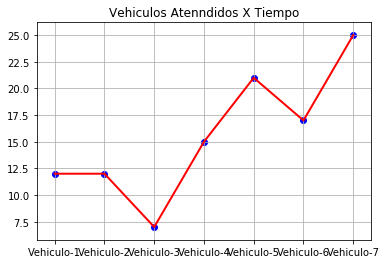

In [16]:
# Generamos la grafica
datos=sorted(tiempo.items()) # Ordenamos los datos
x, y =zip(*datos) # Obtener x(tiempo - clave) y el y(Numero de vehiculos atendidos - valor)
pp.plot(x,y,linewidth=2,color='red') #Dibujamos las lineas
pp.scatter(x,y,color='blue') # Dibujamos los puntos (x,y)
pp.title("Vehiculos Atenndidos X Tiempo")
pp.grid(True) #Generamos una cuadricula
pp.show() #Mostramos el grafico

## Paremetrizando la simulacion

* Considerar 3 tipos de vehículos con 3 diferentes tiempos de lavado:
    * Bus: 20 minutos
    * Automóvil: 7 minutos
    * Furgoneta: 12 minutos
* Considere que a partir de la entrada del vehículo para ser lavado, deberán tomarse en cuenta los siguientes tiempos correspondientes al proceso de traslado desde la recepción a la máquina de lavado:
    * Bus: 4 minutos
    * Automóvil: 1 minuto
    * Furgoneta: 2 minutos
* Realice una gráfica de la simulación con 3 máquinas de lavado

Lavanderia UPS
Llega vehiculo: Bus-1 a la hora 0.00.
Llega vehiculo: Automovil-1 a la hora 0.00.
Llega vehiculo: Furgoneta-1 a la hora 0.00.
Llega vehiculo: Bus-2 a la hora 0.00.
Llega vehiculo: Automovil-2 a la hora 0.00.
Llega vehiculo: Furgoneta-2 a la hora 0.00.
Se traslada vehiculo: Bus-1 a la hora 0.00.
Se traslada vehiculo: Automovil-1 a la hora 0.00.
Se traslada vehiculo: Furgoneta-1 a la hora 0.00.
Entra vehiculo a lavarse: Automovil-1 a la hora 1.00.
Entra vehiculo a lavarse: Furgoneta-1 a la hora 2.00.
Entra vehiculo a lavarse: Bus-1 a la hora 4.00.
68
Llega vehiculo: Automovil-3 a la hora 7.00.
Removido  {87%} suciedad vehiculo => Automovil-1 
Vehiculo [Automovil-1] lavado a las 8.00.
Se traslada vehiculo: Bus-2 a la hora 8.00.
Entra vehiculo a lavarse: Bus-2 a la hora 12.00.
Removido  {67%} suciedad vehiculo => Furgoneta-1 
Vehiculo [Furgoneta-1] lavado a las 14.00.
Se traslada vehiculo: Automovil-2 a la hora 14.00.
Entra vehiculo a lavarse: Automovil-2 a la hora 15.00.
49

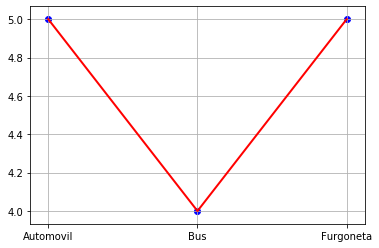

In [40]:
import simpy
import random
import matplotlib.pyplot as pp

# Maximo de vehiculos que puede recibir el negocio
MAX_VEHICULOS = 57 
# Total de maquinas de lavado con que cuenta el negocio
NUM_MAQUINAS = 3
# Tiempo que tarda en trasladarse un vehiculo (minutos)
TRASLADO_BUS = 4
TRASLADO_AUTOMOVIL= 1
TRASLADO_FURGONETA= 2
# Tiempo que tarda en lavarse un vehiculo (minutos)
TIEMPO_BUS = 20
TIEMPO_AUTOMOVIL= 7
TIEMPO_FURGONETA= 12
# Intervalo de tiempo en que llegan vehiculos (minutos)
INTERVALO_LLEGADA = 10
# Tiempo de simulación
TIEMPO_SIMULACION = 100

# Creamos un diccionario para almacenar las horas en que se lavan los vehiculos
tiempo={}

class Lavanderia(object):
    
    def __init__(self, environment, num_maquinas,tiempo_bus,tiempo_automovil,
                 tiempo_furgoneta,traslado_bus,traslado_automovil,traslado_furgoneta):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Creamos el recurso que representa las maquinas
        self.maquinas = simpy.Resource(environment, num_maquinas)
        # Variable para el tiempo de lavado
        self.tiempo_bus = tiempo_bus
        self.tiempo_automovil = tiempo_automovil
        self.tiempo_furgoneta = tiempo_furgoneta
        self.traslado_bus = traslado_bus
        self.traslado_automovil = traslado_automovil
        self.traslado_furgoneta = traslado_furgoneta
        
    def lavar_vehiculo(self, vehiculo):
        automotor=vehiculo.split('-')
        if(automotor[0] == 'Bus'):
            yield self.env.timeout(TIEMPO_BUS)
        if(automotor[0] == 'Automovil'):
            yield self.env.timeout(TIEMPO_AUTOMOVIL)
        if(automotor[0] == 'Furgoneta'):
            yield self.env.timeout(TIEMPO_FURGONETA)
        #Solo agregamos al diccionario al momento que termina de lavar el vehiculo.
        k=automotor[0]
        if k in tiempo:
            tiempo[k]=tiempo[k]+1
        else:
            tiempo[k]=1
            
        # Simulamos que se ha limpiado parte (%) de la suciedad del vehiculo
        # Para el % generamos un entero entre 30 y 90
        print('Removido  {%d%%} suciedad vehiculo => %s ' %(random.randint(30,90), vehiculo))
        
    def trasladar_vehiculo(self, vehiculo):
        automotor=vehiculo.split('-')
        if(automotor[0] == 'Bus'):
            yield self.env.timeout(TRASLADO_BUS)
        if(automotor[0] == 'Automovil'):
            yield self.env.timeout(TRASLADO_AUTOMOVIL)
        if(automotor[0] == 'Furgoneta'):
            yield self.env.timeout(TRASLADO_FURGONETA)
       
    
def llegada_vehiculo(env, nombre, lavanderia):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el vehiculo con el nombre pasado como parametro
    print('Llega vehiculo: %s a la hora %.2f.' % (nombre, env.now))
    
    # Especificamos que vamos a usar un recurso (Resource) que representa
    # la maquina de lavado
    with lavanderia.maquinas.request() as maquina:
        # Ocupamos la maquina de lavado
        yield maquina
        #Indicamos que el vehiculo se esta trasladando para ser lavado
        print('Se traslada vehiculo: %s a la hora %.2f.' % (nombre,env.now))
        #Procesamos el traslado del vehiculo
        yield env.process(lavanderia.trasladar_vehiculo(nombre))
        # Indicamos que vehiculo entra a la lavanderia
        print('Entra vehiculo a lavarse: %s a la hora %.2f.' % (nombre, env.now))
        # Procesamos la operacion de lavado
        yield env.process(lavanderia.lavar_vehiculo(nombre))
        # Una vez que termina la llamada con 'yield', se indica que se ha lavado el vehiculo
        print('Vehiculo [%s] lavado a las %.2f.' % (nombre, env.now))  
        
def ejecutar_simulacion(env, num_maquinas, tiempo_bus,tiempo_automovil,
                        tiempo_furgoneta,traslado_bus,traslado_automovil,
                        traslado_furgoneta, intervalo):
    lavanderia=Lavanderia(env, num_maquinas, tiempo_bus,tiempo_automovil,
                          tiempo_furgoneta,traslado_bus,traslado_automovil,
                          traslado_furgoneta)
    # Creamos 5 llegadas de vehiculos iniciales
    for i in range(2):
        env.process(llegada_vehiculo(env, 'Bus-%d'%(i+1),lavanderia))
        env.process(llegada_vehiculo(env, 'Automovil-%d'%(i+1),lavanderia))
        env.process(llegada_vehiculo(env, 'Furgoneta-%d'%(i+1),lavanderia))
        
    # Ejecutamos la simulacion
    while True:
        yield env.timeout(random.randint(intervalo-3, intervalo+3))
        i+=1
        # Mientras se lavan los vehiculos generamos mas vehiculos
        rnd = random.randint(1,100)
        if rnd <= 20: # Bus 20%, Furgoneta 30% y Automovil 50%
            env.process(llegada_vehiculo(env,'Bus-%d'%(i+1),lavanderia))
        elif rnd <= 50:
            env.process(llegada_vehiculo(env,'Furgoneta-%d'%(i+1),lavanderia))
        else:
            env.process(llegada_vehiculo(env,'Automovil-%d'%(i+1),lavanderia))

print('Lavanderia UPS')

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_MAQUINAS, TIEMPO_BUS,TIEMPO_AUTOMOVIL,
                                TIEMPO_FURGONETA,TRASLADO_BUS,TRASLADO_AUTOMOVIL,
                                TRASLADO_FURGONETA, INTERVALO_LLEGADA))
# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)

# Generamos la grafica
datos=sorted(tiempo.items())
x, y =zip(*datos)
pp.plot(x,y,linewidth=2,color='red')
pp.scatter(x,y,color='blue')
pp.grid(True)
pp.show()

## Práctica  Sympy 2

En base a la simulacion, generar una simulacion lo mas apegado a la realidad del Covid-19, para ello obtener informacion del numero de consultorios y camas disponibles en un hospital del Ecuador. Parametrizar la simulacion para ingresar el numero de pacientes, el numero de consultorios y el numero de camas y algun otro parametro que considere oportuno.

Finalmente generar las siguientes metricas :
- Tiempo de espera promedio para cada sala.
- Tiempo promedio total que requiere un paciente para ser atendido desde cero.
- Cuántos pacientes se atendieron.
- Cuántos pacientes se quedaron sin atender y fallecieron.


## Datos Hospital General Santo Domingo

* **Cantón:** Santo Domingo
* **Consultorios:** 17 consultorios
* **Camas:** 73 camas
* **Colaboradores:** 35 doctores

In [75]:
import simpy
import random
import matplotlib.pyplot as pp
import numpy as np

%matplotlib inline


Centromed = 1
Camas_disp = 73
consultorios_disp = 17
Pas_covid = 324
pas_incremento = 50
tiempo_atencion = 0.0173611
tiempo_internado = 25
TIEMPO_SIMULACION  = 45


Recuperados={}
Fallecidos={}
Tiempo_consulta=[]
Tiempo_espera=[]
No_atencion=[]
Pas_atendidos=[]



class Hospital(object):
    #constructor
    def __init__(self, env, ncamas,nconsultorio, name):
            self.env = env
            self.ncamas = ncamas
            self.nconsultorio=nconsultorio
            self.camas = simpy.Resource(env, ncamas)
            self.consultorios=simpy.Resource(env, nconsultorio)
            self.name = name
    def inicia_atencion(self,paciente):
        tconsu=random.uniform(tiempo_atencion-0.005, tiempo_atencion+0.005)
        yield self.env.timeout(tconsu)
        print('Paciente entra al consultorio, timepo: ', tconsu)
        Tiempo_consulta.append(tconsu)
        
    def paciente_con_cama(self, paciente):
        yield self.env.timeout(random.randint(tiempo_internado-5, tiempo_internado+5))
        print("Cosulta terminada, paciente numero: ", paciente, " salida en: ", self.env.now, " del ", self.name)

def llegada_paciente(env, hospital, paciente):
    arrive = env.now
    with hospital.consultorios.request() as consultorio:
        dias_esperando_consulta=random.randint(1,3)
        Tiempo_espera.append(dias_esperando_consulta)
        requerimiento2 = yield consultorio | env.timeout(dias_esperando_consulta)
        wait2 = env.now - arrive
        if consultorio in requerimiento2:
            print("Paciente: ", paciente, " Tiene la cama ")
            yield env.process(hospital.inicia_atencion(paciente))
            estado = random.randint(1,100)
            Pas_atendidos.append(1)
            if(estado < 40):
                with hospital.camas.request() as cama:
                    arrive2 = env.now
                    dias_esperando = random.randint(1,5) 
                    requerimiento = yield cama | env.timeout(dias_esperando) 
                    wait = env.now - arrive2
                    if cama in requerimiento:
                        print("Paciente: ", paciente, " Tiene la cama ")
                        yield env.process(hospital.paciente_con_cama(paciente))
                        estado = random.randint(1,100)
                        if (estado < 8) :
                            Fallecidos[env.now] = Fallecidos[env.now] + 1 if env.now in Fallecidos else  1
                        else:
                            Recuperados[env.now] = Recuperados[env.now] + 1 if env.now in Recuperados else 1
                    else:
                        print("El paciente " , paciente, " del ", hospital.name, " tuvo una espera ", wait , " dia/s, Fallecio por falta de camas")
                        Fallecidos[env.now] = Fallecidos[env.now] + 1 if env.now in Fallecidos else  1
            else :
                print("Paciente: ", paciente," sin contagio " )
        else:
            print("El paciente " , paciente, " del ", hospital.name, " espero ", wait2 , " dia/s, Fallecio sin entrar a consulta")
            No_atencion.append(1)
            Fallecidos[env.now] = Fallecidos[env.now] + 1 if env.now in Fallecidos else  1
def ejecutar(env, pas_incremento, Pas_covid):
    hospitalA = Hospital(env, Camas_disp,consultorios_disp, "Hospital General Sto. Domingo")
    for i in range(Pas_covid):
        hospitar_asig(env, hospitalA, i)
    paciente = Pas_covid
    while True:
        yield env.timeout(1)
        for i in range(pas_incremento):
            paciente += 1
            hospitar_asig(env, hospitalA, paciente)
                
def hospitar_asig(env, hospitalA, paciente):
    hosp_esc = 1
    if (hosp_esc == 1):
        print("Nuevo paciente infectado : ", paciente, " en un tiempo ", env.now)
        env.process(llegada_paciente(env, hospitalA, paciente))

print("Simulacion Hospital General Santo Domingo")
env=simpy.Environment()
env.process(ejecutar(env,pas_incremento, Pas_covid))
env.run(until=TIEMPO_SIMULACION )

print()
#print("Recuperados: ", Recuperados)
print()
#print("Fallecidos: ", Fallecidos)



Simulacion Hospital General Santo Domingo
Nuevo paciente infectado :  0  en un tiempo  0
Nuevo paciente infectado :  1  en un tiempo  0
Nuevo paciente infectado :  2  en un tiempo  0
Nuevo paciente infectado :  3  en un tiempo  0
Nuevo paciente infectado :  4  en un tiempo  0
Nuevo paciente infectado :  5  en un tiempo  0
Nuevo paciente infectado :  6  en un tiempo  0
Nuevo paciente infectado :  7  en un tiempo  0
Nuevo paciente infectado :  8  en un tiempo  0
Nuevo paciente infectado :  9  en un tiempo  0
Nuevo paciente infectado :  10  en un tiempo  0
Nuevo paciente infectado :  11  en un tiempo  0
Nuevo paciente infectado :  12  en un tiempo  0
Nuevo paciente infectado :  13  en un tiempo  0
Nuevo paciente infectado :  14  en un tiempo  0
Nuevo paciente infectado :  15  en un tiempo  0
Nuevo paciente infectado :  16  en un tiempo  0
Nuevo paciente infectado :  17  en un tiempo  0
Nuevo paciente infectado :  18  en un tiempo  0
Nuevo paciente infectado :  19  en un tiempo  0
Nuevo pa

Paciente:  0  sin contagio 
Paciente:  17  Tiene la cama 
Paciente entra al consultorio, timepo:  0.013063360181847493
Paciente:  14  Tiene la cama 
Paciente entra al consultorio, timepo:  0.013391357576691439
Paciente:  2  Tiene la cama 
Paciente entra al consultorio, timepo:  0.014708715191168224
Paciente:  12  Tiene la cama 
Paciente entra al consultorio, timepo:  0.014878624033574565
Paciente:  13  sin contagio 
Paciente:  18  Tiene la cama 
Paciente entra al consultorio, timepo:  0.015280852523583896
Paciente:  9  Tiene la cama 
Paciente entra al consultorio, timepo:  0.01555201465060997
Paciente:  4  sin contagio 
Paciente:  19  Tiene la cama 
Paciente entra al consultorio, timepo:  0.01617145295862336
Paciente:  16  sin contagio 
Paciente:  20  Tiene la cama 
Paciente entra al consultorio, timepo:  0.016364423411745835
Paciente:  8  Tiene la cama 
Paciente entra al consultorio, timepo:  0.016598383386802033
Paciente:  10  sin contagio 
Paciente:  21  Tiene la cama 
Paciente entr

El paciente  35  del  Hospital General Sto. Domingo  espero  2  dia/s, Fallecio sin entrar a consulta
El paciente  37  del  Hospital General Sto. Domingo  espero  2  dia/s, Fallecio sin entrar a consulta
El paciente  38  del  Hospital General Sto. Domingo  espero  2  dia/s, Fallecio sin entrar a consulta
El paciente  42  del  Hospital General Sto. Domingo  espero  2  dia/s, Fallecio sin entrar a consulta
El paciente  43  del  Hospital General Sto. Domingo  espero  2  dia/s, Fallecio sin entrar a consulta
El paciente  47  del  Hospital General Sto. Domingo  espero  2  dia/s, Fallecio sin entrar a consulta
El paciente  51  del  Hospital General Sto. Domingo  espero  2  dia/s, Fallecio sin entrar a consulta
El paciente  52  del  Hospital General Sto. Domingo  espero  2  dia/s, Fallecio sin entrar a consulta
El paciente  53  del  Hospital General Sto. Domingo  espero  2  dia/s, Fallecio sin entrar a consulta
El paciente  54  del  Hospital General Sto. Domingo  espero  2  dia/s, Fallecio si

El paciente  155  del  Hospital General Sto. Domingo  espero  3  dia/s, Fallecio sin entrar a consulta
El paciente  156  del  Hospital General Sto. Domingo  espero  3  dia/s, Fallecio sin entrar a consulta
El paciente  158  del  Hospital General Sto. Domingo  espero  3  dia/s, Fallecio sin entrar a consulta
El paciente  159  del  Hospital General Sto. Domingo  espero  3  dia/s, Fallecio sin entrar a consulta
El paciente  161  del  Hospital General Sto. Domingo  espero  3  dia/s, Fallecio sin entrar a consulta
El paciente  162  del  Hospital General Sto. Domingo  espero  3  dia/s, Fallecio sin entrar a consulta
El paciente  163  del  Hospital General Sto. Domingo  espero  3  dia/s, Fallecio sin entrar a consulta
El paciente  165  del  Hospital General Sto. Domingo  espero  3  dia/s, Fallecio sin entrar a consulta
El paciente  169  del  Hospital General Sto. Domingo  espero  3  dia/s, Fallecio sin entrar a consulta
El paciente  179  del  Hospital General Sto. Domingo  espero  3  dia/s, F

El paciente  392  del  Hospital General Sto. Domingo  espero  3  dia/s, Fallecio sin entrar a consulta
El paciente  398  del  Hospital General Sto. Domingo  espero  3  dia/s, Fallecio sin entrar a consulta
El paciente  400  del  Hospital General Sto. Domingo  espero  3  dia/s, Fallecio sin entrar a consulta
El paciente  403  del  Hospital General Sto. Domingo  espero  3  dia/s, Fallecio sin entrar a consulta
El paciente  405  del  Hospital General Sto. Domingo  espero  3  dia/s, Fallecio sin entrar a consulta
El paciente  408  del  Hospital General Sto. Domingo  espero  3  dia/s, Fallecio sin entrar a consulta
El paciente  413  del  Hospital General Sto. Domingo  espero  3  dia/s, Fallecio sin entrar a consulta
El paciente  414  del  Hospital General Sto. Domingo  espero  3  dia/s, Fallecio sin entrar a consulta
El paciente  418  del  Hospital General Sto. Domingo  espero  3  dia/s, Fallecio sin entrar a consulta
El paciente  422  del  Hospital General Sto. Domingo  espero  3  dia/s, F

Nuevo paciente infectado :  678  en un tiempo  8
Nuevo paciente infectado :  679  en un tiempo  8
Nuevo paciente infectado :  680  en un tiempo  8
Nuevo paciente infectado :  681  en un tiempo  8
Nuevo paciente infectado :  682  en un tiempo  8
Nuevo paciente infectado :  683  en un tiempo  8
Nuevo paciente infectado :  684  en un tiempo  8
Nuevo paciente infectado :  685  en un tiempo  8
Nuevo paciente infectado :  686  en un tiempo  8
Nuevo paciente infectado :  687  en un tiempo  8
Nuevo paciente infectado :  688  en un tiempo  8
Nuevo paciente infectado :  689  en un tiempo  8
Nuevo paciente infectado :  690  en un tiempo  8
Nuevo paciente infectado :  691  en un tiempo  8
Nuevo paciente infectado :  692  en un tiempo  8
Nuevo paciente infectado :  693  en un tiempo  8
Nuevo paciente infectado :  694  en un tiempo  8
Nuevo paciente infectado :  695  en un tiempo  8
Nuevo paciente infectado :  696  en un tiempo  8
Nuevo paciente infectado :  697  en un tiempo  8
Nuevo paciente infec

Nuevo paciente infectado :  801  en un tiempo  10
Nuevo paciente infectado :  802  en un tiempo  10
Nuevo paciente infectado :  803  en un tiempo  10
Nuevo paciente infectado :  804  en un tiempo  10
Nuevo paciente infectado :  805  en un tiempo  10
Nuevo paciente infectado :  806  en un tiempo  10
Nuevo paciente infectado :  807  en un tiempo  10
Nuevo paciente infectado :  808  en un tiempo  10
Nuevo paciente infectado :  809  en un tiempo  10
Nuevo paciente infectado :  810  en un tiempo  10
Nuevo paciente infectado :  811  en un tiempo  10
Nuevo paciente infectado :  812  en un tiempo  10
Nuevo paciente infectado :  813  en un tiempo  10
Nuevo paciente infectado :  814  en un tiempo  10
Nuevo paciente infectado :  815  en un tiempo  10
Nuevo paciente infectado :  816  en un tiempo  10
Nuevo paciente infectado :  817  en un tiempo  10
Nuevo paciente infectado :  818  en un tiempo  10
Nuevo paciente infectado :  819  en un tiempo  10
Nuevo paciente infectado :  820  en un tiempo  10


El paciente  793  del  Hospital General Sto. Domingo  espero  2  dia/s, Fallecio sin entrar a consulta
El paciente  796  del  Hospital General Sto. Domingo  espero  2  dia/s, Fallecio sin entrar a consulta
El paciente  797  del  Hospital General Sto. Domingo  espero  2  dia/s, Fallecio sin entrar a consulta
El paciente  799  del  Hospital General Sto. Domingo  espero  2  dia/s, Fallecio sin entrar a consulta
El paciente  802  del  Hospital General Sto. Domingo  espero  2  dia/s, Fallecio sin entrar a consulta
El paciente  804  del  Hospital General Sto. Domingo  espero  2  dia/s, Fallecio sin entrar a consulta
El paciente  807  del  Hospital General Sto. Domingo  espero  2  dia/s, Fallecio sin entrar a consulta
El paciente  815  del  Hospital General Sto. Domingo  espero  2  dia/s, Fallecio sin entrar a consulta
El paciente  818  del  Hospital General Sto. Domingo  espero  2  dia/s, Fallecio sin entrar a consulta
El paciente  820  del  Hospital General Sto. Domingo  espero  2  dia/s, F

El paciente  875  del  Hospital General Sto. Domingo  espero  2  dia/s, Fallecio sin entrar a consulta
El paciente  879  del  Hospital General Sto. Domingo  espero  2  dia/s, Fallecio sin entrar a consulta
El paciente  885  del  Hospital General Sto. Domingo  espero  2  dia/s, Fallecio sin entrar a consulta
El paciente  887  del  Hospital General Sto. Domingo  espero  2  dia/s, Fallecio sin entrar a consulta
El paciente  888  del  Hospital General Sto. Domingo  espero  2  dia/s, Fallecio sin entrar a consulta
El paciente  890  del  Hospital General Sto. Domingo  espero  2  dia/s, Fallecio sin entrar a consulta
El paciente  892  del  Hospital General Sto. Domingo  espero  2  dia/s, Fallecio sin entrar a consulta
El paciente  894  del  Hospital General Sto. Domingo  espero  2  dia/s, Fallecio sin entrar a consulta
El paciente  895  del  Hospital General Sto. Domingo  espero  2  dia/s, Fallecio sin entrar a consulta
El paciente  896  del  Hospital General Sto. Domingo  espero  2  dia/s, F

El paciente  981  del  Hospital General Sto. Domingo  espero  3  dia/s, Fallecio sin entrar a consulta
El paciente  984  del  Hospital General Sto. Domingo  espero  3  dia/s, Fallecio sin entrar a consulta
El paciente  987  del  Hospital General Sto. Domingo  espero  3  dia/s, Fallecio sin entrar a consulta
El paciente  989  del  Hospital General Sto. Domingo  espero  3  dia/s, Fallecio sin entrar a consulta
El paciente  991  del  Hospital General Sto. Domingo  espero  3  dia/s, Fallecio sin entrar a consulta
El paciente  998  del  Hospital General Sto. Domingo  espero  3  dia/s, Fallecio sin entrar a consulta
El paciente  1000  del  Hospital General Sto. Domingo  espero  3  dia/s, Fallecio sin entrar a consulta
El paciente  1005  del  Hospital General Sto. Domingo  espero  3  dia/s, Fallecio sin entrar a consulta
El paciente  1006  del  Hospital General Sto. Domingo  espero  3  dia/s, Fallecio sin entrar a consulta
El paciente  1008  del  Hospital General Sto. Domingo  espero  3  dia/

Cosulta terminada, paciente numero:  34  salida en:  20.082253053182146  del  Hospital General Sto. Domingo
Paciente:  1178  Tiene la cama 
Paciente entra al consultorio, timepo:  0.0216093707587284
Paciente:  1178  sin contagio 
Paciente:  1179  Tiene la cama 
Paciente entra al consultorio, timepo:  0.014812570838913595
Paciente:  1179  sin contagio 
Paciente:  1185  Tiene la cama 
Paciente entra al consultorio, timepo:  0.012814146366708351
Paciente:  1185  Tiene la cama 
Nuevo paciente infectado :  1325  en un tiempo  21
Nuevo paciente infectado :  1326  en un tiempo  21
Nuevo paciente infectado :  1327  en un tiempo  21
Nuevo paciente infectado :  1328  en un tiempo  21
Nuevo paciente infectado :  1329  en un tiempo  21
Nuevo paciente infectado :  1330  en un tiempo  21
Nuevo paciente infectado :  1331  en un tiempo  21
Nuevo paciente infectado :  1332  en un tiempo  21
Nuevo paciente infectado :  1333  en un tiempo  21
Nuevo paciente infectado :  1334  en un tiempo  21
Nuevo pacie

El paciente  1329  del  Hospital General Sto. Domingo  espero  3  dia/s, Fallecio sin entrar a consulta
El paciente  1331  del  Hospital General Sto. Domingo  espero  3  dia/s, Fallecio sin entrar a consulta
El paciente  1333  del  Hospital General Sto. Domingo  espero  3  dia/s, Fallecio sin entrar a consulta
El paciente  1335  del  Hospital General Sto. Domingo  espero  3  dia/s, Fallecio sin entrar a consulta
El paciente  1338  del  Hospital General Sto. Domingo  espero  3  dia/s, Fallecio sin entrar a consulta
El paciente  1339  del  Hospital General Sto. Domingo  espero  3  dia/s, Fallecio sin entrar a consulta
El paciente  1342  del  Hospital General Sto. Domingo  espero  3  dia/s, Fallecio sin entrar a consulta
El paciente  1346  del  Hospital General Sto. Domingo  espero  3  dia/s, Fallecio sin entrar a consulta
El paciente  1347  del  Hospital General Sto. Domingo  espero  3  dia/s, Fallecio sin entrar a consulta
El paciente  1348  del  Hospital General Sto. Domingo  espero  3

Nuevo paciente infectado :  1641  en un tiempo  27
Nuevo paciente infectado :  1642  en un tiempo  27
Nuevo paciente infectado :  1643  en un tiempo  27
Nuevo paciente infectado :  1644  en un tiempo  27
Nuevo paciente infectado :  1645  en un tiempo  27
Nuevo paciente infectado :  1646  en un tiempo  27
Nuevo paciente infectado :  1647  en un tiempo  27
Nuevo paciente infectado :  1648  en un tiempo  27
Nuevo paciente infectado :  1649  en un tiempo  27
Nuevo paciente infectado :  1650  en un tiempo  27
Nuevo paciente infectado :  1651  en un tiempo  27
Nuevo paciente infectado :  1652  en un tiempo  27
Nuevo paciente infectado :  1653  en un tiempo  27
Nuevo paciente infectado :  1654  en un tiempo  27
Nuevo paciente infectado :  1655  en un tiempo  27
Nuevo paciente infectado :  1656  en un tiempo  27
Nuevo paciente infectado :  1657  en un tiempo  27
Nuevo paciente infectado :  1658  en un tiempo  27
Nuevo paciente infectado :  1659  en un tiempo  27
Nuevo paciente infectado :  166

El paciente  1690  del  Hospital General Sto. Domingo  espero  1  dia/s, Fallecio sin entrar a consulta
El paciente  1693  del  Hospital General Sto. Domingo  espero  1  dia/s, Fallecio sin entrar a consulta
El paciente  1702  del  Hospital General Sto. Domingo  espero  1  dia/s, Fallecio sin entrar a consulta
El paciente  1704  del  Hospital General Sto. Domingo  espero  1  dia/s, Fallecio sin entrar a consulta
El paciente  1706  del  Hospital General Sto. Domingo  espero  1  dia/s, Fallecio sin entrar a consulta
El paciente  1708  del  Hospital General Sto. Domingo  espero  1  dia/s, Fallecio sin entrar a consulta
El paciente  1711  del  Hospital General Sto. Domingo  espero  1  dia/s, Fallecio sin entrar a consulta
El paciente  1712  del  Hospital General Sto. Domingo  espero  1  dia/s, Fallecio sin entrar a consulta
El paciente  1715  del  Hospital General Sto. Domingo  espero  1  dia/s, Fallecio sin entrar a consulta
El paciente  1718  del  Hospital General Sto. Domingo  espero  1

Nuevo paciente infectado :  1966  en un tiempo  33
Nuevo paciente infectado :  1967  en un tiempo  33
Nuevo paciente infectado :  1968  en un tiempo  33
Nuevo paciente infectado :  1969  en un tiempo  33
Nuevo paciente infectado :  1970  en un tiempo  33
Nuevo paciente infectado :  1971  en un tiempo  33
Nuevo paciente infectado :  1972  en un tiempo  33
Nuevo paciente infectado :  1973  en un tiempo  33
Nuevo paciente infectado :  1974  en un tiempo  33
El paciente  1775  del  Hospital General Sto. Domingo  espero  3  dia/s, Fallecio sin entrar a consulta
El paciente  1784  del  Hospital General Sto. Domingo  espero  3  dia/s, Fallecio sin entrar a consulta
El paciente  1792  del  Hospital General Sto. Domingo  espero  3  dia/s, Fallecio sin entrar a consulta
El paciente  1795  del  Hospital General Sto. Domingo  espero  3  dia/s, Fallecio sin entrar a consulta
El paciente  1796  del  Hospital General Sto. Domingo  espero  3  dia/s, Fallecio sin entrar a consulta
El paciente  1798  de

El paciente  2056  del  Hospital General Sto. Domingo  espero  1  dia/s, Fallecio sin entrar a consulta
El paciente  2058  del  Hospital General Sto. Domingo  espero  1  dia/s, Fallecio sin entrar a consulta
El paciente  2059  del  Hospital General Sto. Domingo  espero  1  dia/s, Fallecio sin entrar a consulta
El paciente  2062  del  Hospital General Sto. Domingo  espero  1  dia/s, Fallecio sin entrar a consulta
El paciente  2063  del  Hospital General Sto. Domingo  espero  1  dia/s, Fallecio sin entrar a consulta
El paciente  2065  del  Hospital General Sto. Domingo  espero  1  dia/s, Fallecio sin entrar a consulta
El paciente  2066  del  Hospital General Sto. Domingo  espero  1  dia/s, Fallecio sin entrar a consulta
El paciente  2070  del  Hospital General Sto. Domingo  espero  1  dia/s, Fallecio sin entrar a consulta
El paciente  2073  del  Hospital General Sto. Domingo  espero  1  dia/s, Fallecio sin entrar a consulta
Nuevo paciente infectado :  2125  en un tiempo  37
Nuevo pacient

El paciente  2190  del  Hospital General Sto. Domingo  espero  2  dia/s, Fallecio sin entrar a consulta
El paciente  2192  del  Hospital General Sto. Domingo  espero  2  dia/s, Fallecio sin entrar a consulta
El paciente  2193  del  Hospital General Sto. Domingo  espero  2  dia/s, Fallecio sin entrar a consulta
El paciente  2195  del  Hospital General Sto. Domingo  espero  2  dia/s, Fallecio sin entrar a consulta
El paciente  2196  del  Hospital General Sto. Domingo  espero  2  dia/s, Fallecio sin entrar a consulta
El paciente  2201  del  Hospital General Sto. Domingo  espero  2  dia/s, Fallecio sin entrar a consulta
El paciente  2204  del  Hospital General Sto. Domingo  espero  2  dia/s, Fallecio sin entrar a consulta
El paciente  2205  del  Hospital General Sto. Domingo  espero  2  dia/s, Fallecio sin entrar a consulta
El paciente  2206  del  Hospital General Sto. Domingo  espero  2  dia/s, Fallecio sin entrar a consulta
El paciente  2207  del  Hospital General Sto. Domingo  espero  2

Nuevo paciente infectado :  2494  en un tiempo  44
Nuevo paciente infectado :  2495  en un tiempo  44
Nuevo paciente infectado :  2496  en un tiempo  44
Nuevo paciente infectado :  2497  en un tiempo  44
Nuevo paciente infectado :  2498  en un tiempo  44
Nuevo paciente infectado :  2499  en un tiempo  44
Nuevo paciente infectado :  2500  en un tiempo  44
Nuevo paciente infectado :  2501  en un tiempo  44
Nuevo paciente infectado :  2502  en un tiempo  44
Nuevo paciente infectado :  2503  en un tiempo  44
Nuevo paciente infectado :  2504  en un tiempo  44
Nuevo paciente infectado :  2505  en un tiempo  44
Nuevo paciente infectado :  2506  en un tiempo  44
Nuevo paciente infectado :  2507  en un tiempo  44
Nuevo paciente infectado :  2508  en un tiempo  44
Nuevo paciente infectado :  2509  en un tiempo  44
Nuevo paciente infectado :  2510  en un tiempo  44
Nuevo paciente infectado :  2511  en un tiempo  44
Nuevo paciente infectado :  2512  en un tiempo  44
Nuevo paciente infectado :  251

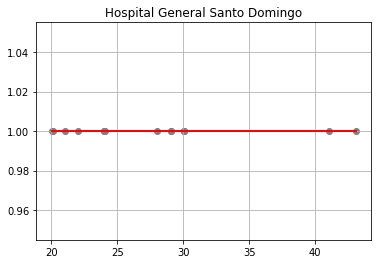

In [84]:
datos=sorted(Recuperados.items()) 
x, y =zip(*datos) 
pp.plot(x,y,linewidth=2,color='red') 
pp.scatter(x,y,color='gray') 
pp.title("Hospital General Santo Domingo")
pp.grid(True) 
pp.show() 

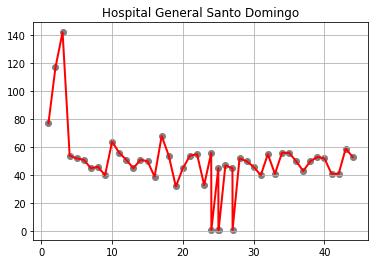

In [82]:
if (Fallecidos):
    datos=sorted(Fallecidos.items())
    x, y =zip(*datos) 
    pp.plot(x,y,linewidth=2,color='red') 
    pp.scatter(x,y,color='gray') 
    pp.title("Hospital General Santo Domingo")
    pp.grid(True) 
    pp.show() 

In [77]:
print("Tiempo de espera: ", sum(Tiempo_consulta)/len(Tiempo_consulta),"= 24 minutos")
print()
print("Tiempo de atencion paciente desde su llegada: ", sum(Tiempo_espera)/len(Tiempo_espera),"= 2 dias")
print()
print("Total de pacientes atendidos:", sum(Pas_atendidos))
print()
print("Total pacientes sin atender: ", sum(No_atencion))
print()

Tiempo de espera:  0.01704417898783583 = 24 minutos

Tiempo de atencion paciente desde su llegada:  2.012282091917591 = 2 dias

Total de pacientes atendidos: 78

Total pacientes sin atender:  2352



## Referencias
[1] Matloff, N. (2008). Introduction to Discrete-Event Simulation and the SimPy Language.

[2] Team Simpy (2017). SimPy Documentation, Release 3.0.10, 2017. URL: https://media.readthedocs.org/pdf/simpy/latest/simpy.pdf 